In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars

%matplotlib inline

# INTRO to GG

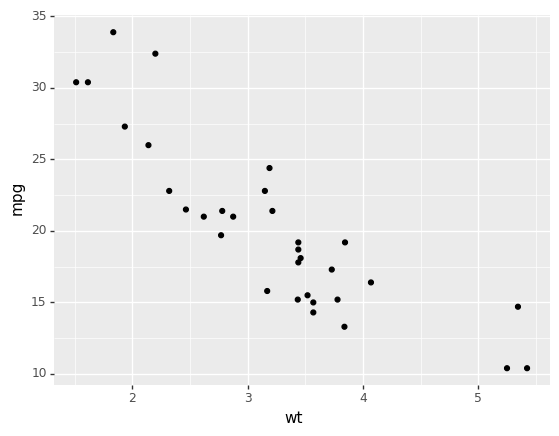

<ggplot: (-9223372036554283516)>

In [2]:
(ggplot(mtcars, aes('wt', 'mpg'))
 + geom_point())

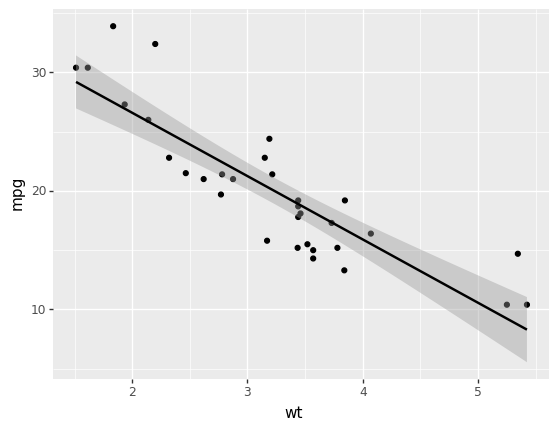

<ggplot: (300497647)>

In [3]:
(ggplot(mtcars, aes('wt', 'mpg'))
 + geom_point()
 + stat_smooth(method='lm'))

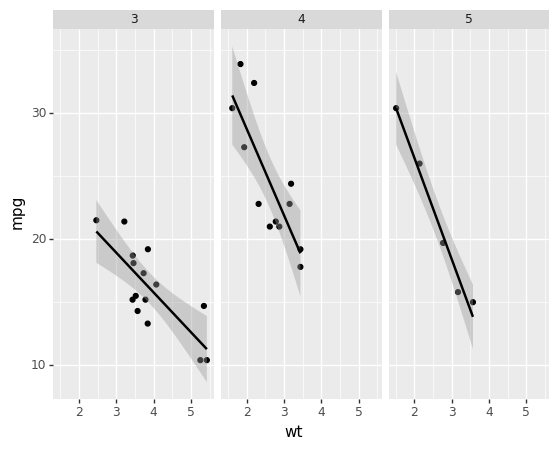

<ggplot: (300961512)>

In [4]:
(ggplot(mtcars, aes('wt', 'mpg'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

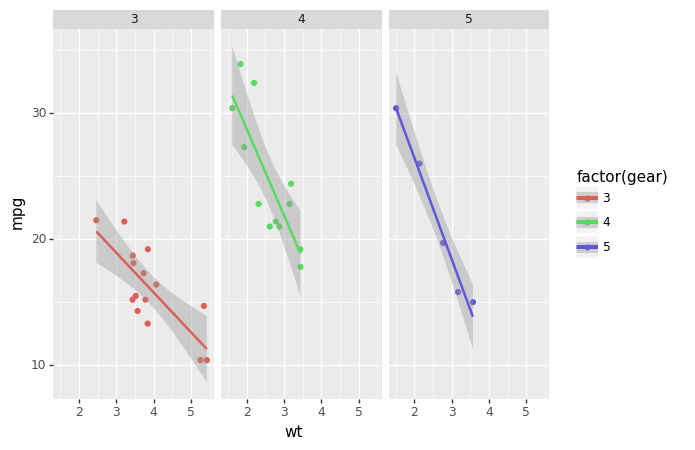

<ggplot: (-9223372036553373454)>

In [5]:
(ggplot(mtcars, aes('wt', 'mpg', color = 'factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

In [3]:
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# GG Basic Steps
## 1. Tell GG WHAT data you want to use

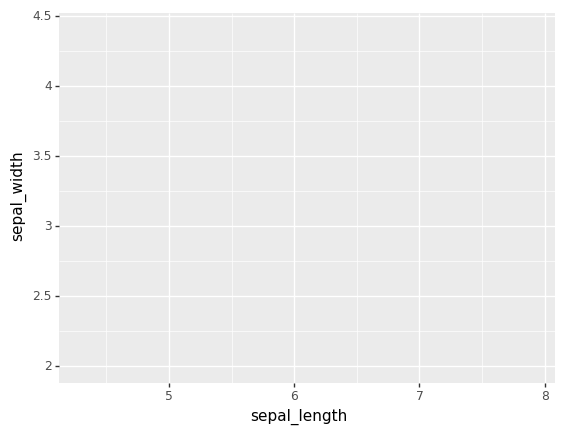

<ggplot: (-9223372036552448582)>

In [30]:
(ggplot(iris,aes(x = 'sepal_length',
                      y = 'sepal_width',
                color = 'species')))

## 2. Tell GG HOW you want the data to show up

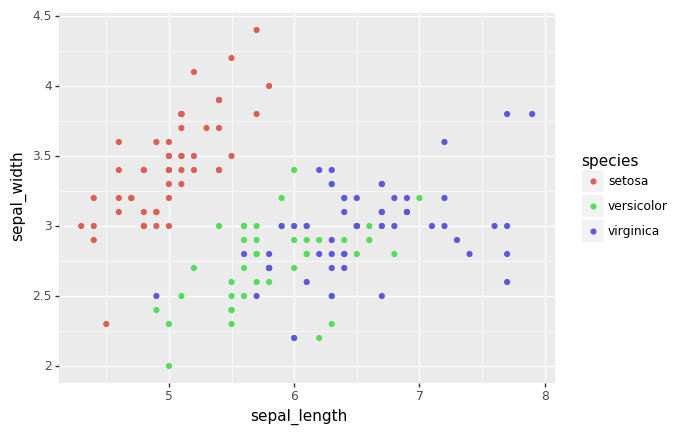

<ggplot: (-9223372036551842237)>

In [31]:
(ggplot(iris,aes(x = 'sepal_length',
                      y = 'sepal_width',
                color = 'species'))
+ geom_point())

## 1. Tell GG WHAT data you want to use

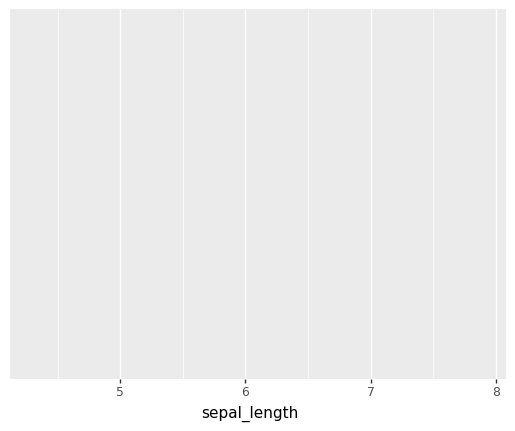

<ggplot: (-9223372036552448603)>

In [32]:
(ggplot(iris, aes(x='sepal_length')))

## 2. Tell GG HOW you want the data to show up

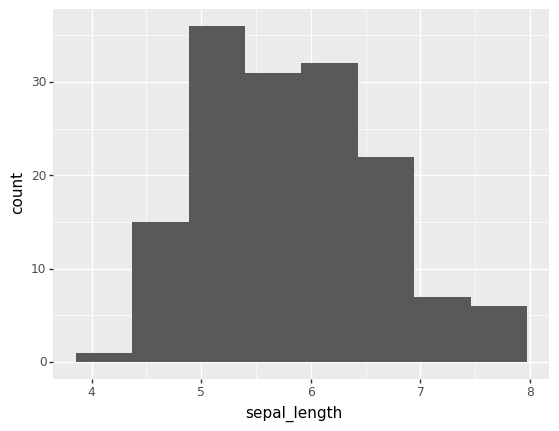

<ggplot: (305529927)>

In [36]:
(ggplot(iris, aes(x='sepal_length')) + geom_histogram())

## 1. Tell GG WHAT data you want to use

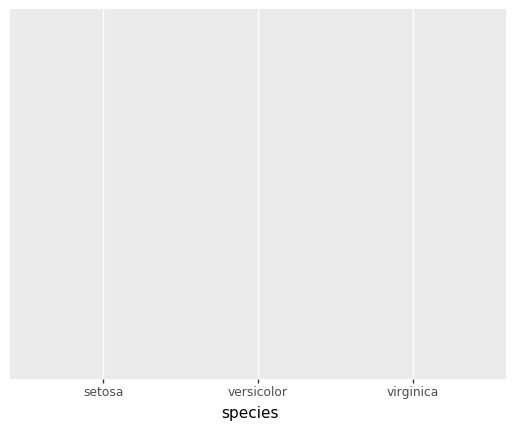

<ggplot: (-9223372036553135037)>

In [9]:
(ggplot(iris,aes(x = "species")))

## 2. Tell GG HOW you want the data to show up

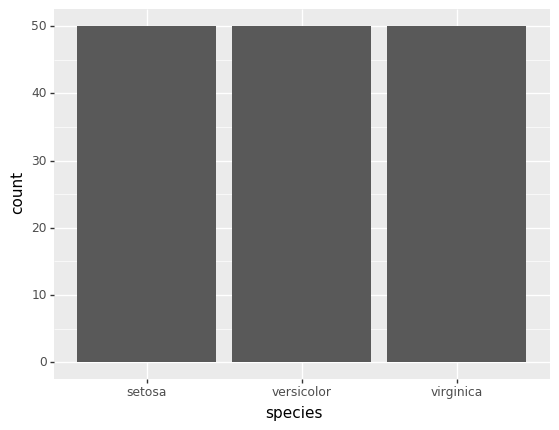

<ggplot: (301794806)>

In [10]:
(ggplot(iris,aes(x = "species")) + geom_bar())

## 1. Tell GG WHAT data you want to use

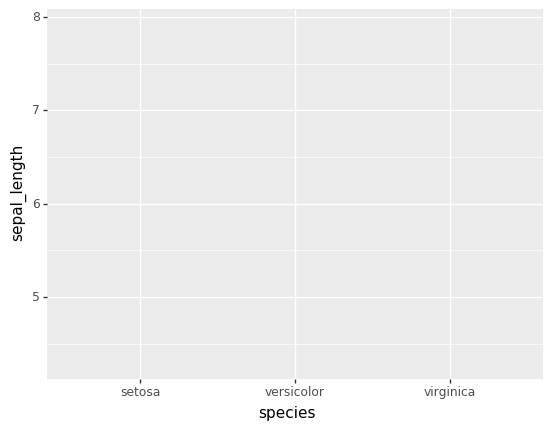

<ggplot: (301812821)>

In [11]:
(ggplot(iris, aes(x = "species",
                        y = "sepal_length")))

## 2. Tell GG HOW you want the data to show up

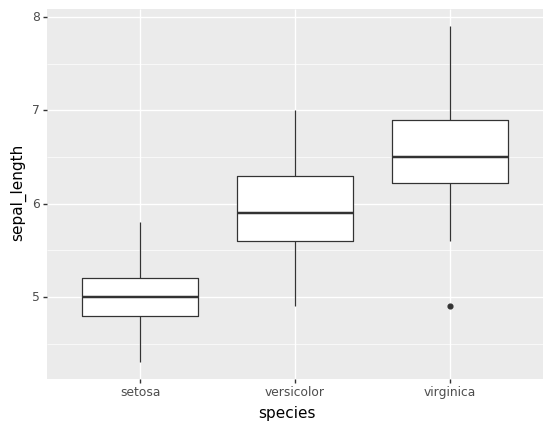

<ggplot: (301640775)>

In [12]:
(ggplot(iris, aes(x = "species",
                        y = "sepal_length")) + geom_boxplot())

## 3. Extras

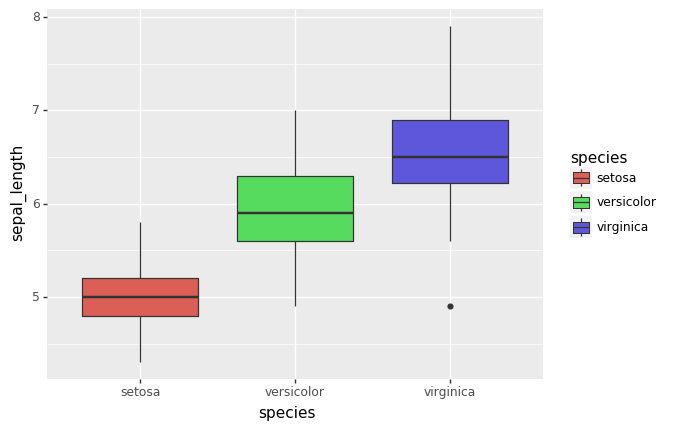

<ggplot: (-9223372036552962886)>

In [14]:
(ggplot(iris, aes(x = "species",
                        y = "sepal_length", fill = "species")) + geom_boxplot())

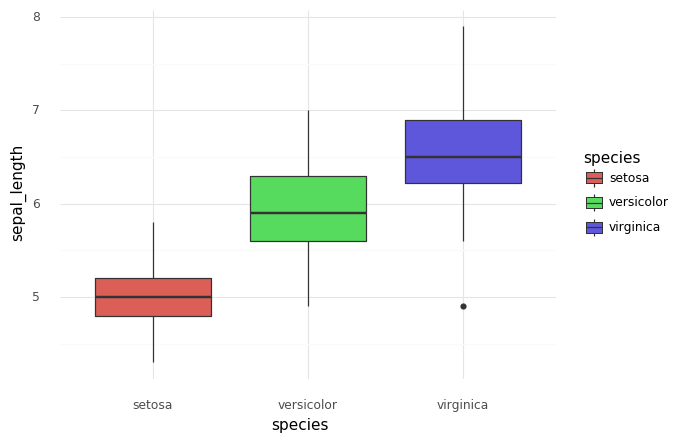

<ggplot: (-9223372036553739162)>

In [15]:
(ggplot(iris, aes(x = "species",
                        y = "sepal_length", fill = "species")) + geom_boxplot() + theme_minimal())

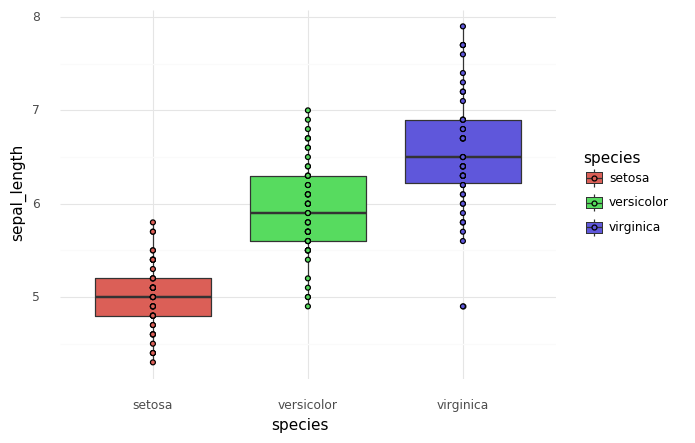

<ggplot: (-9223372036554198524)>

In [16]:
(ggplot(iris, aes(x = "species",
                        y = "sepal_length", fill = "species")) + geom_boxplot() +
 theme_minimal() + geom_point())

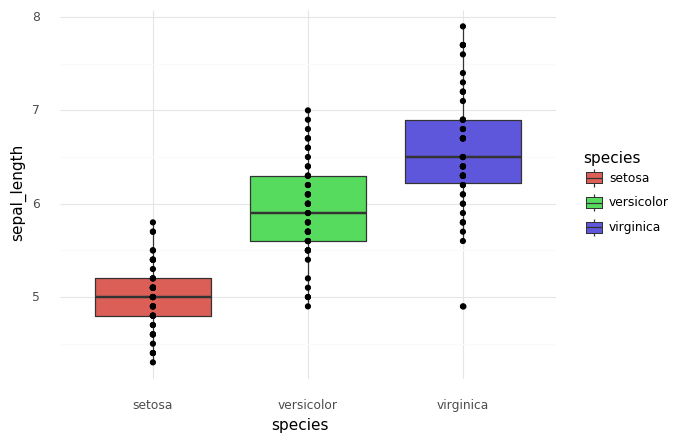

<ggplot: (302665273)>

In [17]:
(ggplot(iris, aes(x = "species",
                        y = "sepal_length")) + geom_boxplot(aes( fill = "species")) +
 theme_minimal() + geom_point())

# Prepping Data for Barcharts


In [25]:
bar_iris = iris.groupby("species").agg({"sepal_width": ["mean", "std", "min"]})
bar_iris.columns = ["height_cm", "std", "min"]
bar_iris["species"] = bar_iris.index
bar_iris

Index(['height_cm', 'std', 'min', 'species'], dtype='object')

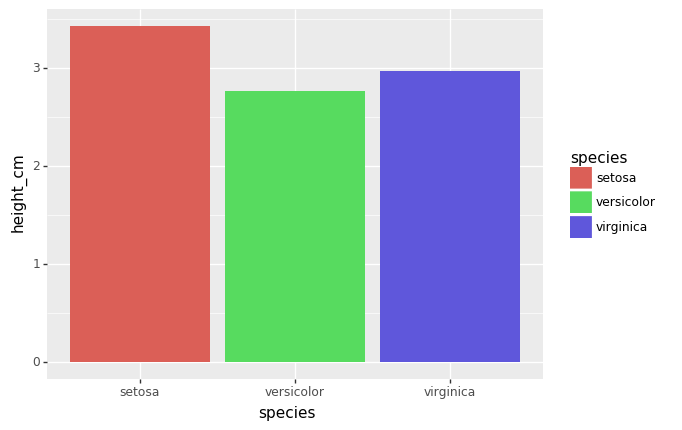

<ggplot: (-9223372036552950640)>

In [28]:
(ggplot(bar_iris, aes( x = "species", y = "height_cm", fill = "species")) + geom_bar(stat = "identity"))

# Let's Try to explore a new data set using Visualization!

In [18]:
cereal = pd.read_csv("https://raw.githubusercontent.com/reisanar/datasets/master/Cereals.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


What are you interested in knowing?

* Which manufacturers are there?
* Average Calories?
* Type?

In [24]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [36]:
cereal["mfr"].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

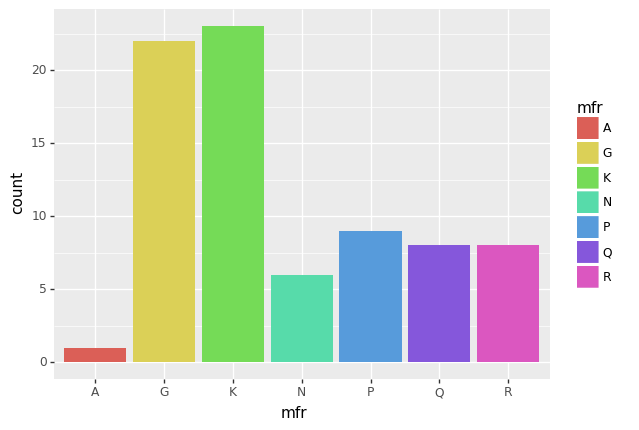

<ggplot: (-9223372036549422988)>

In [40]:
(ggplot(cereal, aes("mfr")) + geom_bar(aes(fill = "mfr")))

In [45]:
cereal[["calories"]].mean()
cereal[["calories"]].max()

calories    160
dtype: int64

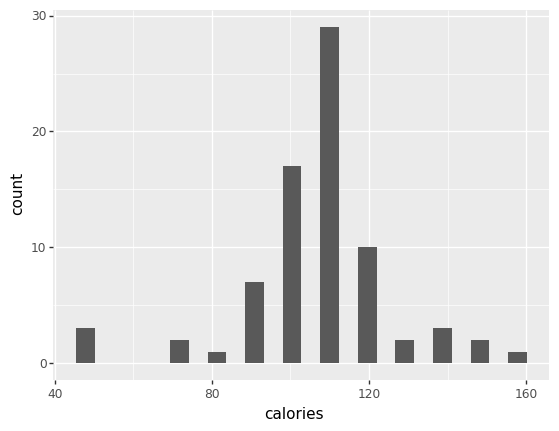

<ggplot: (305380030)>

In [41]:
(ggplot(cereal, aes("calories")) + geom_histogram())

In [43]:
cereal["type"].value_counts()

C    74
H     3
Name: type, dtype: int64

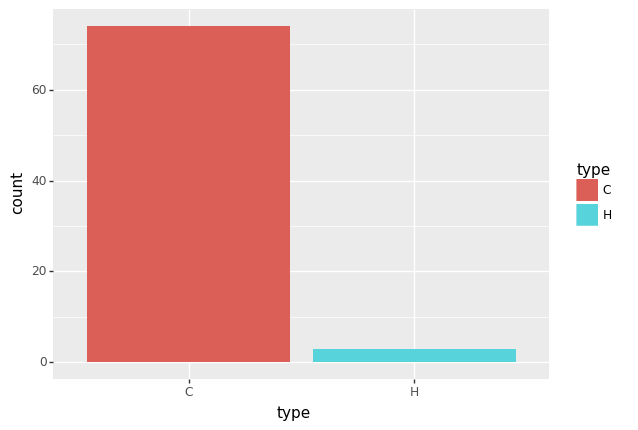

<ggplot: (305556712)>

In [44]:
(ggplot(cereal, aes("type")) + geom_bar(aes(fill = "type")))